<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220513.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* titanic

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import sklearn.datasets as skd
import os

# titanic

In [4]:
s1 = sns.load_dataset('titanic')
s1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
s1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


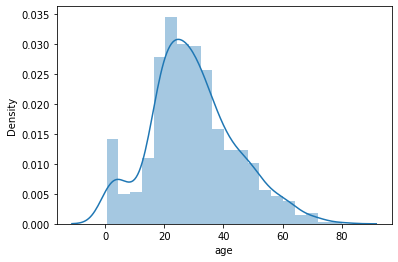

In [6]:
sns.distplot(s1['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


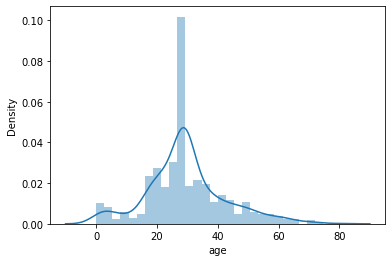

In [8]:
s1['age'] = s1['age'].fillna(s1['age'].mean()).astype(int)
sns.distplot(s1['age'])

In [10]:
# embarked         2
# embark_town      2
# deck           688
s1.drop(['deck'], axis = 1, inplace = True)


In [13]:
s1[['embarked', 'embark_town']] = s1[['embarked', 'embark_town']].fillna(s1[['embarked', 'embark_town']].mode().iloc[0,0])

In [14]:
s1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [15]:
s1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [22]:
s1.groupby(['sibsp', 'alone', 'parch'])['alone', 'parch'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


alone  parch
sibsp alone parch              
0     False 1         38     38
            2         29     29
            3          1      1
            4          1      1
            5          2      2
      True  0        537    537
1     False 0        123    123
            1         57     57
            2         19     19
            3          3      3
            4          3      3
            5          3      3
            6          1      1
2     False 0         16     16
            1          7      7
            2          4      4
            3          1      1
3     False 0          2      2
            1          7      7
            2          7      7
4     False 1          9      9
            2          9      9
5     False 2          5      5
8     False 2          7      7

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


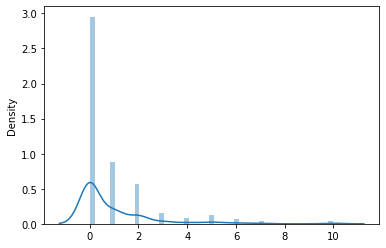

In [24]:
sns.distplot(s1['parch'] + s1['sibsp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


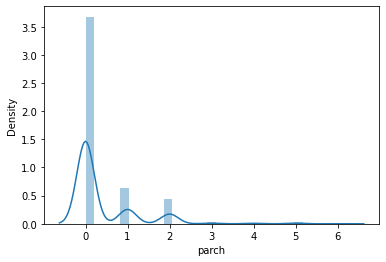

In [25]:
sns.distplot(s1['parch'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


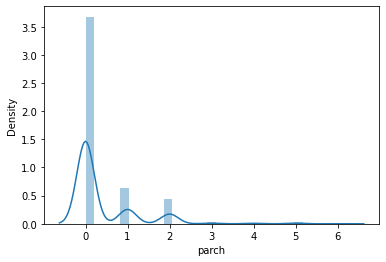

In [26]:
sns.distplot(s1['parch'])

In [28]:
(s1['parch'] != s1['sibsp']).value_counts()

False    598
True     293
dtype: int64

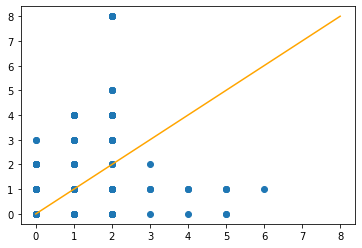

In [30]:
plt.plot(s1['parch'], s1['sibsp'], 'o')
plt.plot([0,8], [0,8], color = 'orange')

In [37]:
((s1['parch'] + s1['alone'].astype(int)) == s1['sibsp']).value_counts()

False    830
True      61
dtype: int64

In [43]:
 s1['family'] = s1['parch'] + s1['sibsp'] + 1
 s1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False,2
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,2
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False,2
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True,1


In [46]:
s1 = s1.assign(fam_size = lambda x : np.select([x['family'] >= 5, x['family'] >= 2, x['family'] >= 1], 
                                          ['large', 'small', 'alone']))

In [47]:
s1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family,fam_size
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False,2,small
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,2,small
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1,alone
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False,2,small
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,alone


In [49]:
s1.drop(['pclass', 'sibsp', 'parch', 'embark_town', 'who', 'adult_male', 'alive', 'alone', 'family'], axis = 1, inplace = True)

In [50]:
s1.head()

,survived,sex,age,fare,embarked,class,fam_size
0,0,male,22,7.2500,S,Third,small
1,1,female,38,71.2833,C,First,small
2,1,female,26,7.9250,S,Third,alone
3,1,female,35,53.1000,S,First,small
4,0,male,35,8.0500,S,Third,alone


In [52]:
s2 = pd.get_dummies(s1, columns = ['sex', 'embarked', 'class', 'fam_size'], prefix = ['sex', 'town', 'class', 'fam'])
s2.head()

,survived,age,fare,sex_female,sex_male,town_C,town_Q,town_S,class_First,class_Second,class_Third,fam_alone,fam_large,fam_small
0,0,22,7.2500,0,1,0,0,1,0,0,1,0,0,1
1,1,38,71.2833,1,0,1,0,0,1,0,0,0,0,1
2,1,26,7.9250,1,0,0,0,1,0,0,1,1,0,0
3,1,35,53.1000,1,0,0,0,1,1,0,0,0,0,1
4,0,35,8.0500,0,1,0,0,1,0,0,1,1,0,0


In [56]:
s2['survived'] = s2['survived'].astype('category')

In [57]:
s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      891 non-null    category
 1   age           891 non-null    int64   
 2   fare          891 non-null    float64 
 3   sex_female    891 non-null    uint8   
 4   sex_male      891 non-null    uint8   
 5   town_C        891 non-null    uint8   
 6   town_Q        891 non-null    uint8   
 7   town_S        891 non-null    uint8   
 8   class_First   891 non-null    uint8   
 9   class_Second  891 non-null    uint8   
 10  class_Third   891 non-null    uint8   
 11  fam_alone     891 non-null    uint8   
 12  fam_large     891 non-null    uint8   
 13  fam_small     891 non-null    uint8   
dtypes: category(1), float64(1), int64(1), uint8(11)
memory usage: 24.6 KB


In [59]:
x = s2[['age', 'fare', 'sex_female', 'sex_male', 'town_C', 'town_Q',
       'town_S', 'class_First', 'class_Second', 'class_Third', 'fam_alone',
       'fam_large', 'fam_small']]
y = s2['survived']

In [60]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [62]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)

In [63]:
pred_rf = fit_rf.predict(x_te)

In [65]:
fit_rf.score(x_tr, y_tr), fit_rf.score(x_te, y_te)

(0.9775280898876404, 0.8059701492537313)